# Cálculos iniciales de carteras:



Una cartera es un conjunto de activos financieros, como acciones o bonos, seleccionados para alcanzar un objetivo financiero específico: maximizar el rendimiento, minimizar el riesgo o equilibrar ambos. La gestión de carteras implica decisiones estratégicas sobre asignación de activos, diversificación y ajustes periódicos según las condiciones del mercado. 

En este notebook, aprenderemos las nociones básicas para caracterizar una cartera en términos de rentabilidad y volatilidad a partir de los activos que la componen.

## Carteras de dos activos

Definir una cartera de activos implica especificar los diferentes instrumentos financieros o activos que la componen y la proporción en la que se invierte en cada uno. Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$. Debe cumplirse que $w_1 + w_2 = 1.0$ ya que representa el 100% de la inversión.

* $\bar R_p$ a la rentabilidad media o esperanza de la cartera $\Rightarrow \boldsymbol{\bar{R}_p = w_1 \bar{R}_1 + w_2 \bar{R}_2}$. Es una suma ponderada de la rentabilidad de cada activo por el porcentaje de inversión $w_i$ en cada activo.


* Varianza $\boldsymbol{\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_{12}} \quad siendo \quad \sigma_{12} = \rho_{12} \sigma_1 \sigma_2$, donde $\rho_{12}$ es el coeficiente de correlación entre los activos 1 y 2. La varianza de la cartera se ve afectada por las covarianzas ($\sigma_{12}$) entre los activos.

* Volatilidad $\sigma_{P} = \sqrt{\sigma_{P}^2}$

**NOTA: El riesgo (volatilidad de una cartera) no depende solo de las volatilidades de los activos que la componen sino también de cómo se relacionen esos activos entre sí (covarianzas)**

Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_std_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [32]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [33]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [34]:
#definimos una cartera con dos activos
ret1 = 0.2 #retornos esperados del activo 1
ret2 = 0.1 #retornos esperados del activo 2

std1 = 0.25 #volatilidad del activo 1
std2 = 0.15 #volatilidad del activo 2

p1 = 0.4 #peso del activo 1
p2 = 0.6 #peso del activo 2

# definimos el coeficiente de correlación
coef_corr = 0.6

In [35]:
print(f'El retorno de la cartera es: {100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es: {100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %')

El retorno de la cartera es: 14.00 %
La volatilidad de la cartera es: 17.00 %


<div style="background-color: #e0f7fa; padding: 10px;">

Calcula rentabilidades y volatilidades de carteras cambiando los pesos y el coeficiente de correlación.

#### Ahora vamos a hacerlo con activos reales. Descarga de datos.

In [36]:
data = yf.download(["AAPL", "GLD", "MSFT", "SPY"], start="2018-12-31", end="2023-12-31")
data = data.loc[:, "Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [37]:
# rentabilidad = np.log(data).diff(axis=0).dropna(axis=0, how="any")
rentabilidad = np.log(data).diff().dropna()

rentabilidad.head(5)

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2019-01-02 00:00:00+00:00,0.001141,0.000660,-0.004441,0.001040
2019-01-03 00:00:00+00:00,-0.104924,0.009025,-0.037482,-0.024152
2019-01-04 00:00:00+00:00,0.041803,-0.008119,0.045460,0.032947
2019-01-07 00:00:00+00:00,-0.002228,0.003453,0.001275,0.007854
2019-01-08 00:00:00+00:00,0.018883,-0.002712,0.007224,0.009352


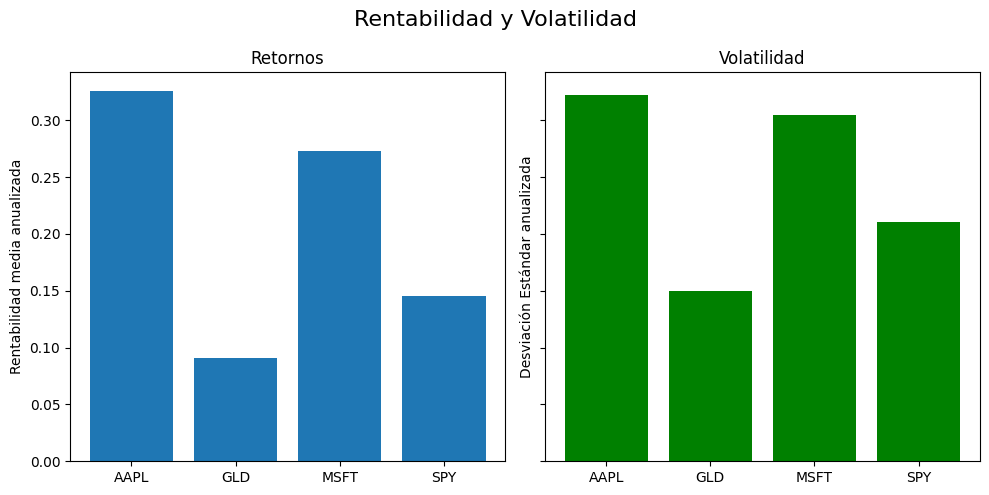

In [38]:
import matplotlib.pyplot as plt

# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = rentabilidad.mean() * 252
stds = rentabilidad.std() * np.sqrt(252)

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Retornos")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

Calcula la rentabilidad y volatilidad anual de una cartera formada por un 60% de APPL y un 40% de GLD 

In [39]:
#definimos una cartera con dos activos
ret_aapl = rentabilidad['AAPL'].mean() * 252 #retornos esperados del activo 1
ret_gld = rentabilidad['GLD'].mean() * 252 #retornos esperados del activo 2    

std_aapl = rentabilidad['AAPL'].std() * np.sqrt(252) #volatilidad del activo 1
std_gld = rentabilidad['GLD'].std() * np.sqrt(252) #volatilidad del activo 2

p_aapl = 0.6 #peso del AAPL
p_gld = 0.4 #peso de GLD

# definimos el coeficiente de correlación
coef_corr = np.corrcoef(rentabilidad['AAPL'], rentabilidad['GLD'])[0, 1]

In [40]:
rent_cartera = calc_ret_cartera(p_aapl, p_gld, ret_aapl, ret_gld)
std_cartera = calc_std_cartera(p_aapl, p_gld, std_aapl, std_gld, coef_corr)

print(f'El retorno de la cartera es: {100*rent_cartera:.2f} %')
print(f'La volatilidad de la cartera es: {100*std_cartera:.2f} %')


El retorno de la cartera es: 23.20 %
La volatilidad de la cartera es: 20.73 %


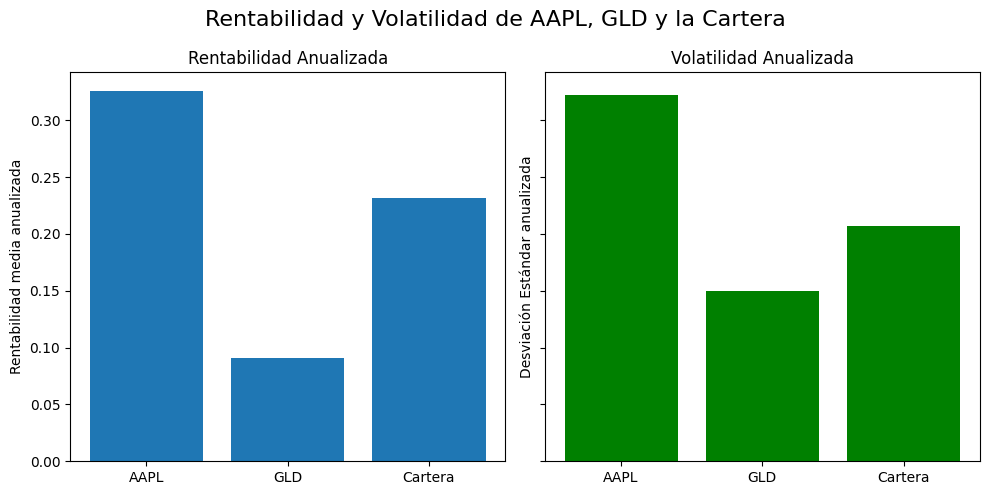

In [41]:
# Filtramos solo los activos que queremos mostrar, AAPL y GLD
means_filtered = means.loc[['AAPL', 'GLD']]
stds_filtered = stds.loc[['AAPL', 'GLD']]

# Añadimos los datos de la cartera
means_filtered['Cartera'] = rent_cartera
stds_filtered['Cartera'] = std_cartera

# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios (Rentabilidad) en el subplot de la izquierda
axes[0].bar(means_filtered.index, means_filtered.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Rentabilidad Anualizada")

# Crear el gráfico de barras de los valores de desviación estándar en el subplot de la derecha
axes[1].bar(stds_filtered.index, stds_filtered.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad Anualizada")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad de AAPL, GLD y la Cartera", fontsize=16)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

Calcula ahora la rentabilidad y volatilidad de una cartera compuesta por cuatro activos con los siguientes datos:

$ \text{Pesos } (\mathbf{w}) = \begin{bmatrix} 0.2 \\ 0.3 \\ 0.4 \\ 0.1 \end{bmatrix} $

$ \text{Rentabilidades Medias } (\mu) = \begin{bmatrix} 0.06 \\ 0.08 \\ 0.10 \\ 0.15 \end{bmatrix} $

$ \text{Matriz de Covarianzas } (\Sigma) = \begin{bmatrix}
0.10 & 0.01 & 0.03 & 0.05 \\
0.01 & 0.30 & 0.06 & -0.04 \\
0.03 & 0.06 & 0.40 & 0.02 \\
0.05 & -0.04 & 0.02 & 0.50 \\
\end{bmatrix} $


In [42]:
#DAtos del problema


# Generamos un vector a partir de una lista
pesos_w = np.array([0.2, 0.3, 0.4, 0.1])

rentabilidad_medias = np.array([0.06, 0.08, 0.1, 0.15])


# Generamos una matriz a partir de una lista de listas
matriz_covarianzas = np.array([[0.10, 0.01, 0.03, 0.05],
                               [0.01, 0.30, 0.06, -0.04],
                               [0.03, 0.06, 0.40, 0.02],
                               [0.05,-0.04, 0.02, 0.50]])


In [43]:
#INSERTAR TU CÓDIGO AQUÍ

# Calcula la rentabilidad media de la cartera mediante la multiplicación de los pesos de la cartera (pesos_w)
# por el vector de rentabilidades medias de los activos (rentabilidad_medias).
# La operación @ realiza el producto matricial entre el vector de pesos y el vector de rentabilidades.
rentabilidad_cartera = pesos_w.T @ rentabilidad_medias

# Imprime la rentabilidad media de la cartera con 4 decimales.
print(f"Rentabilidad media de cartera X: {rentabilidad_cartera:.4f}")

# Calcula la varianza de la cartera utilizando los pesos de los activos y la matriz de covarianzas.
# La operación matricial es pesos_w.T @ matriz_covarianzas @ pesos_w, que es una forma estándar de calcular 
# la varianza total de la cartera.
sigma2_cartera = pesos_w.T @ matriz_covarianzas @ pesos_w

# La volatilidad de la cartera es la raíz cuadrada de la varianza (desviación estándar).
volatilidad_cartera = np.sqrt(sigma2_cartera)

# Imprime la varianza (desviación típica al cuadrado) de la cartera con 4 decimales.
print(f"Desviación típica de cartera X: {sigma2_cartera:.4f}")

# Imprime la volatilidad de la cartera con 4 decimales.
print(f"Volatilidad de cartera X: {volatilidad_cartera:.4f}")


Rentabilidad media de cartera X: 0.0910
Desviación típica de cartera X: 0.1216
Volatilidad de cartera X: 0.3487


Para calcular los retornos y volatilidades de carteras de varios activos necesitamos multiplicar matrices:

**Rentabilidad** de la cartera $E(\tilde R_p)=\sum_{i=1}^{N}w_i E(\tilde R_i)$

$E(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix}  \begin{pmatrix}\mu_1 \\\mu_2  \\...  \\ \mu_N\end{pmatrix} = \mathbf{w}^T\mathbf{\mu} \qquad siendo \; \mu_i \; la \; rentabilidad \; media \; del \; activo_i$

$\sigma²(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}w_1 \\w_2  \\...  \\ w_N\end{pmatrix} = \mathbf{w}^T\mathbf{\Sigma}\mathbf{w}$

### Para operar con matrices usamos **ARRAYS** de la librería **NUMPY**

<center>
          <img src="../imgs/dataframe_vs_array.PNG" alt="Por qué curso" width="600"/>
</center>

**CREACIÓN DE ARRAYS**

Podemos  **crear arrays** de múltiples maneras:

* A partir de una lista o lista de listas

* Arrays de ceros o de unos

* Entre dos valores y uniformemente distribuidos

* A partir de un DataFrame

In [44]:
lista_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array_1 = np.array(lista_1)
array_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
lista_2 = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
array_2 = np.array(lista_2)
array_2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [46]:
lista_3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array_3 = np.array(lista_3).reshape(2, 5)
array_3

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [47]:
# Generamos un vector de ceros de tamaño 10
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
# Generamos una matriz de ceros de tamaño 3x6
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [49]:
# Generamos un vector de unos de tamaño 2x3
array_unos = np.ones((2, 3))
array_unos

array([[1., 1., 1.],
       [1., 1., 1.]])

In [50]:
# Para ver dimensiones de un array
array_unos.shape

(2, 3)

In [51]:
# Generamos un vestor con valores equiespaciados

np.linspace(0, 1, 11) # (inicio, fin, número de puntos)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [52]:
data.head(2)

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31 00:00:00+00:00,37.70705,121.250000,95.926331,228.166229
2019-01-02 00:00:00+00:00,37.75008,121.330002,95.501312,228.403625


In [53]:
# Generamos un array a partir de un DataFrame
data.values

array([[ 37.70705032, 121.25      ,  95.92633057, 228.16622925],
       [ 37.75008011, 121.33000183,  95.50131226, 228.40362549],
       [ 33.9899025 , 122.43000031,  91.98802948, 222.95332336],
       ...,
       [192.41983032, 192.58999634, 372.03671265, 472.05856323],
       [192.84822083, 191.47000122, 373.2401123 , 472.23687744],
       [191.8021698 , 191.16999817, 373.9960022 , 470.86975098]])

<div style="background-color: #e0f7fa; padding: 10px;">

Calcula un array de pesos de una cartera equiponderada de 20 activos y comprueba que la suma de pesos vale 1

In [54]:
pesos = np.ones(20)/20
pesos

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [55]:
pesos.sum()

np.float64(1.0000000000000002)

In [56]:
# Ver dimensiones de un array

print(pesos.ndim)
print(pesos.shape)
print(pesos.size)

1
(20,)
20


<div style="background-color: #e0f7fa; padding: 10px;">

Calcula 100 carteras distintas compuestas por AAPL y GLD, ajustando los pesos de manera equidistante entre ambos activos. Los datos de los activos son los siguientes:

Rentabilidades medias: ret_aapl, ret_gld  

Volatilidades: std_aapl, std_gld 

Coeficiente de correlación: coef_corr



In [57]:
pesos_aapl = np.linspace(0, 1, 100)
pesos_gld = 1 - pesos_aapl

# Inicializar listas para almacenar rentabilidades y volatilidades de las carteras
rentabilidades_carteras = []
volatilidades_carteras = []

# Calcular las rentabilidades y volatilidades para cada combinación de pesos
for w_aapl, w_gld in zip(pesos_aapl, pesos_gld):
    rentabilidad_cartera = calc_ret_cartera(w_aapl, w_gld, ret_aapl, ret_gld)
    volatilidad_cartera = calc_std_cartera(w_aapl, w_gld, std_aapl, std_gld, coef_corr)
    
    rentabilidades_carteras.append(rentabilidad_cartera)
    volatilidades_carteras.append(volatilidad_cartera)

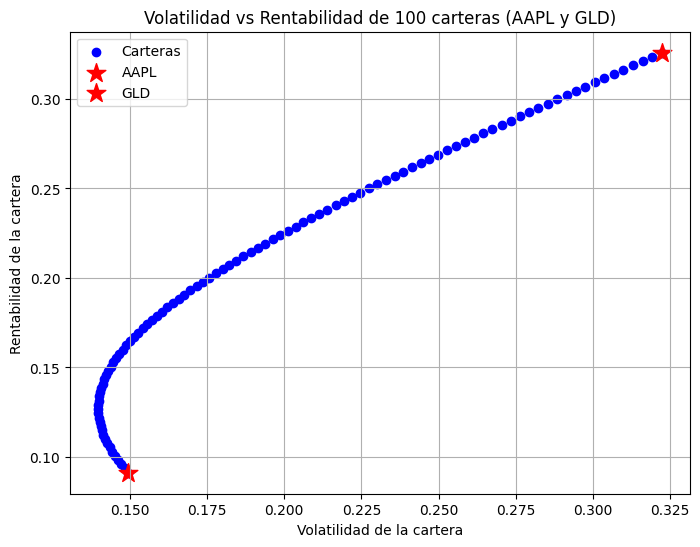

In [58]:

# Dibujar el scatter plot de volatilidades (en el eje X) y rentabilidades (en el eje Y)
plt.figure(figsize=(8, 6))
plt.scatter(volatilidades_carteras, rentabilidades_carteras, c='blue', marker='o', label="Carteras")

# Añadir estrellas rojas para los puntos de AAPL y GLD
plt.scatter(std_aapl, ret_aapl, c='red', marker='*', s=200, label="AAPL")  # AAPL con estrella roja
plt.scatter(std_gld, ret_gld, c='red', marker='*', s=200, label="GLD")    # GLD con estrella roja

# Etiquetas y título
plt.xlabel("Volatilidad de la cartera")
plt.ylabel("Rentabilidad de la cartera")
plt.title("Volatilidad vs Rentabilidad de 100 carteras (AAPL y GLD)")

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


**INDEXACIÓN Y SLICING**

<div style="display: flex; align-items: center; justify-content: center;">
  
  <!-- Primera imagen con su título -->
  <figure style="margin-right: 20px; text-align: center;">
    <img src="../imgs/np_2.png" alt="drawing" width="90%"/>
    <figcaption>Figura 1: INDEXACIÓN</figcaption>
  </figure>
  
  <!-- Segunda imagen con su título -->
  <figure style="text-align: center;">
    <img src="../imgs/np_3.png" alt="drawing" width="50%"/>
    <figcaption>Figura 2: SLICING</figcaption>
  </figure>

</div>

In [59]:
array_2d = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

In [60]:
print(array_2d.ndim)
print(array_2d.shape)
print(array_2d.size)

2
(2, 5)
10


In [61]:
print(array_2d)
print(array_2d[0, 0])
print(array_2d[0, 4])
print(array_2d[1, 0])
print(array_2d[1, 4])
print(array_2d[0, 1:4])
print(array_2d[1, 1:4])
print(array_2d[0:2, 0])
print(array_2d[0:2, 1])
print(array_2d[0:2, 2])
print(array_2d[0:2, 3])
print(array_2d[0:2, 1:3])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
1
5
6
10
[2 3 4]
[7 8 9]
[1 6]
[2 7]
[3 8]
[4 9]
[[2 3]
 [7 8]]


<div style="background-color: #e0f7fa; padding: 10px;">

Dada la matriz de covarianzas de antes (matriz_covarianzas), dime:
    
* $\sigma_{1,2}$
* $\sigma_{2,3}$
* $\sigma^2_{4}$
* Muestra las covarianzas menores que 0.02

In [62]:
matriz_covarianzas

array([[ 0.1 ,  0.01,  0.03,  0.05],
       [ 0.01,  0.3 ,  0.06, -0.04],
       [ 0.03,  0.06,  0.4 ,  0.02],
       [ 0.05, -0.04,  0.02,  0.5 ]])

In [63]:
print(f'Covarianza activo 1 con activo 2: {matriz_covarianzas[0, 1]:.2f}')
print(f'Covarianza activo 2 con activo 3: {matriz_covarianzas[1, 2]:.2f}')
print(f'Varianza activo 4: {matriz_covarianzas[3, 3]:.2f}')

Covarianza activo 1 con activo 2: 0.01
Covarianza activo 2 con activo 3: 0.06
Varianza activo 4: 0.50


In [64]:
mask = matriz_covarianzas < 0.02

matriz_covarianzas[mask]

array([ 0.01,  0.01, -0.04, -0.04])

**MULTIPLICACIONES DE MATRICES**

Para calcular las rentabilidades y volatilidades de carteras con varios activos, es necesario multiplicar matrices. Esto se logra eficientemente utilizando arrays de la biblioteca NumPy en Python.

$\begin{bmatrix}
1 &2 \\ 
 3& 4
\end{bmatrix}\times
\begin{bmatrix}
5 &6 \\ 
 7& 8
\end{bmatrix} = 
\begin{bmatrix}
(1\cdot 5+2\cdot 7)&(1\cdot 6+2\cdot 8) \\ 
(3\cdot 5+4\cdot 7)&(3\cdot 6+4\cdot 8)
\end{bmatrix} = 
\begin{bmatrix}
19 &22 \\ 
 43& 50
\end{bmatrix}$

In [65]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [66]:
A @ B

array([[19, 22],
       [43, 50]])

In [67]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

- También podemos usarlo para multiplicar un vector por una matriz

In [68]:
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

La operación sería la siguiente
$\begin{bmatrix}
1 &2 \\ 
 3&4 
\end{bmatrix}\times \begin{bmatrix}
5 \\6 
\end{bmatrix}= \begin{bmatrix}
1\cdot 5 + 2 \cdot 6\\ 
3\cdot 5 + 4 \cdot 6
\end{bmatrix}= \begin{bmatrix}
17\\ 
39
\end{bmatrix}$

In [69]:
A @ b

array([17, 39])

In [70]:
# OJO QUE NO ES LO MISMO QUE b@A

b@A

array([23, 34])

En este caso, la operación sería la siguiente
$\begin{bmatrix}
5 &6 
\end{bmatrix}\times \begin{bmatrix}
1 &2 \\ 
 3&4 
\end{bmatrix}= \begin{bmatrix}
(5\cdot 1 + 6 \cdot 3)& 
(5\cdot 2 + 6 \cdot 4)
\end{bmatrix}= \begin{bmatrix}
23& 
34
\end{bmatrix}$

<div style="background-color: #e0f7fa; padding: 10px;">

CALCULAR LA RENTABILIDAD Y VOLATILIDAD DE UNA CARTERA EQUIPONDERADA FORMADA POR LOS CUATRO ACTIVOS AAPL, GLD, MSFT Y SPY.

1- Decárga y limpia los datos desde 2010 hasta hoy de Yahoo finance

2- Calcula las rentabilidades medias, volatilidades y covarianzas

3- Genera los pesos y calcula rentabilidd y volatilidad de la cartera

4- Muestra los resultados


1- Decárga y limpia los datos desde 2010 hasta hoy de Yahoo finance

In [71]:
# Definir los activos y el periodo de tiempo
activos = ['AAPL', 'GLD', 'MSFT', 'SPY']
fecha_inicio = '2010-01-01'
fecha_fin = datetime.today().strftime('%Y-%m-%d')

# Descargar los datos desde Yahoo Finance
datos = yf.download(activos, start=fecha_inicio, end=fecha_fin)['Adj Close']

# Limpiar los datos eliminando valores faltantes
datos = datos.dropna()

[*********************100%***********************]  4 of 4 completed


2- Calcula las rentabilidades medias, volatilidades y covarianzas

In [72]:
# Calcular los retornos logarítmicos diarios
retornos = np.log(datos).diff().dropna()

# Calcular las rentabilidades medias, volatilidades (desviación estándar) y la matriz de covarianza
rentabilidades_medias = retornos.mean()
volatilidades = retornos.std()
matriz_covarianza = retornos.cov()

3- Genera los pesos y calcula rentabilidd y volatilidad de la cartera

In [73]:
# Crear pesos iguales para la cartera
pesos = np.array([1/len(activos)] * len(activos))

# Calcular la rentabilidad de la cartera
rentabilidad_cartera = np.dot(pesos, rentabilidades_medias)

# Calcular la volatilidad de la cartera
volatilidad_cartera = np.sqrt(pesos.T@ matriz_covarianzas @ pesos)

4- Muestra los resultados

In [74]:
# Mostrar los resultados individuales de los activos
metricas_activos = pd.DataFrame({
    'Rentabilidad Media': rentabilidades_medias,
    'Volatilidad': volatilidades
}, index=activos)

# Resumen de la cartera
resumen_cartera = pd.DataFrame({
    'Rentabilidad de la Cartera': [rentabilidad_cartera],
    'Volatilidad de la Cartera': [volatilidad_cartera]
})

print("Métricas de los Activos:")
print(metricas_activos)
print("\nResumen de la Cartera:")
print(resumen_cartera)


Métricas de los Activos:
      Rentabilidad Media  Volatilidad
AAPL            0.000963     0.017659
GLD             0.000214     0.009781
MSFT            0.000790     0.016163
SPY             0.000509     0.010824

Resumen de la Cartera:
   Rentabilidad de la Cartera  Volatilidad de la Cartera
0                    0.000619                    0.31225


___________________

### Otra forma de abordar el análisis de carteras

Pero también podemos calcular los retornos diarios de la cartera y luego calcular la rentabilidad  media y la volatilidad

$R_{cartera, t} = w_1 * R_{1, t} + w_2 * R_{2, t}$

In [81]:
rentabilidad_cartera = p_aapl * rentabilidad['AAPL'] + p_gld * rentabilidad['GLD']

rent_cartera_media = rentabilidad_cartera.mean() * 252
std_cartera = rentabilidad_cartera.std() * np.sqrt(252)

print(f'El retorno de la cartera es: {100*rent_cartera_media:.2f} %')
print(f'La volatilidad de la cartera es: {100*std_cartera:.2f} %')

El retorno de la cartera es: 23.20 %
La volatilidad de la cartera es: 20.73 %


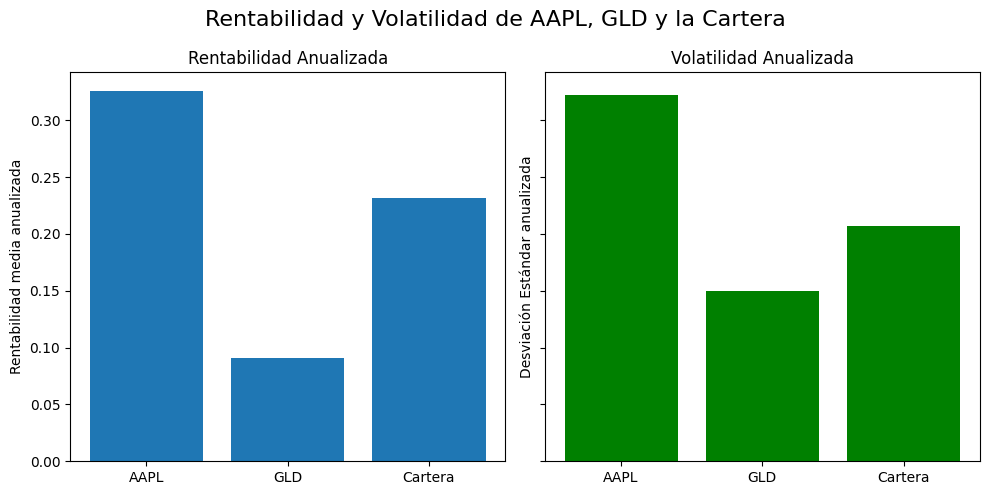

In [82]:
# Filtramos solo los activos que queremos mostrar, AAPL y GLD
means_filtered = means.loc[['AAPL', 'GLD']]
stds_filtered = stds.loc[['AAPL', 'GLD']]

# Añadimos los datos de la cartera
means_filtered['Cartera'] = rent_cartera_media
stds_filtered['Cartera'] = std_cartera

# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios (Rentabilidad) en el subplot de la izquierda
axes[0].bar(means_filtered.index, means_filtered.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Rentabilidad Anualizada")

# Crear el gráfico de barras de los valores de desviación estándar en el subplot de la derecha
axes[1].bar(stds_filtered.index, stds_filtered.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad Anualizada")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad de AAPL, GLD y la Cartera", fontsize=16)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

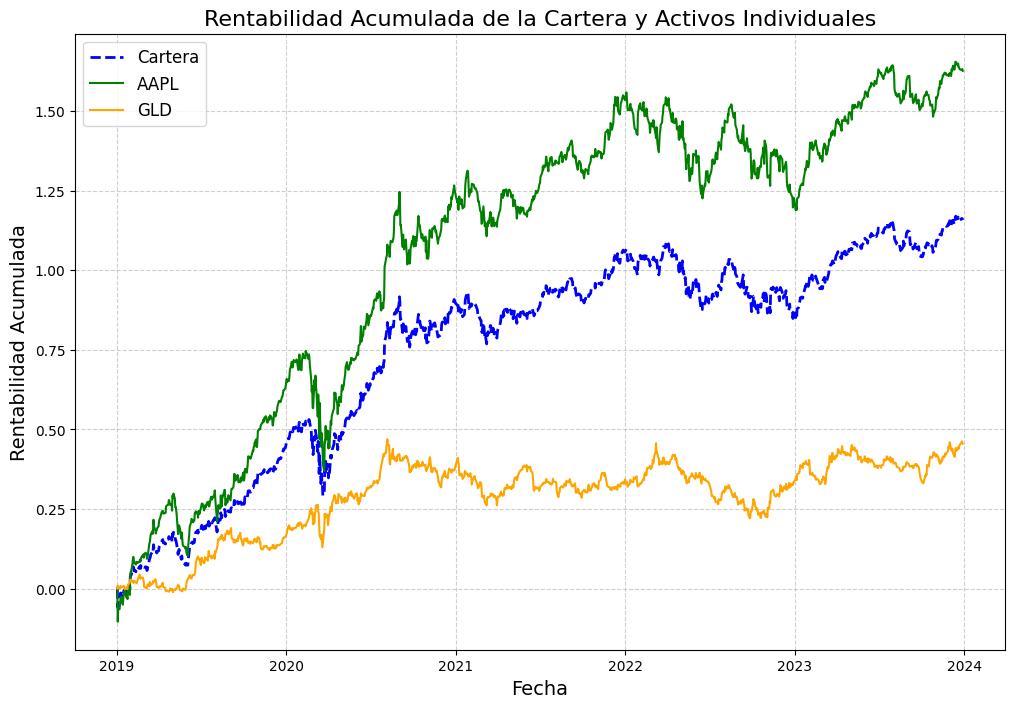

In [85]:
# Cálculo de la rentabilidad acumulada
rentabilidad_cartera_acum = rentabilidad_cartera.cumsum()

# Crear la figura y el tamaño
plt.figure(figsize=(12, 8))

# Trazar la rentabilidad acumulada de la cartera y los activos individuales
plt.plot(rentabilidad['AAPL'].index, rentabilidad_cartera_acum, label='Cartera', linewidth=2, color='blue', linestyle='--')
plt.plot(rentabilidad['AAPL'].cumsum().index, rentabilidad['AAPL'].cumsum(), label='AAPL', linewidth=1.5, color='green')
plt.plot(rentabilidad['GLD'].cumsum().index, rentabilidad['GLD'].cumsum(), label='GLD', linewidth=1.5, color='orange')

# Añadir título y etiquetas a los ejes
plt.title('Rentabilidad Acumulada de la Cartera y Activos Individuales', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Rentabilidad Acumulada', fontsize=14)

# Añadir leyenda
plt.legend(fontsize=12)

# Añadir cuadrícula para mejor visualización
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


#### CORRELACIÓN ENTRE LOS ACTIVOS

Si recordáis, la volatilidad de la cartera depende de la volatilidd de los activos y de las relaciones (covarianzas) entre ellos. ¿Cómo podríamos visualizar si los activos están correlacionados?

Una `scatter_matrix`nos presenta una combinación de ``histograma`` en la diagonal principal y un scatter plot con la ``covarianza`` en el resto de posiciones de la matriz.

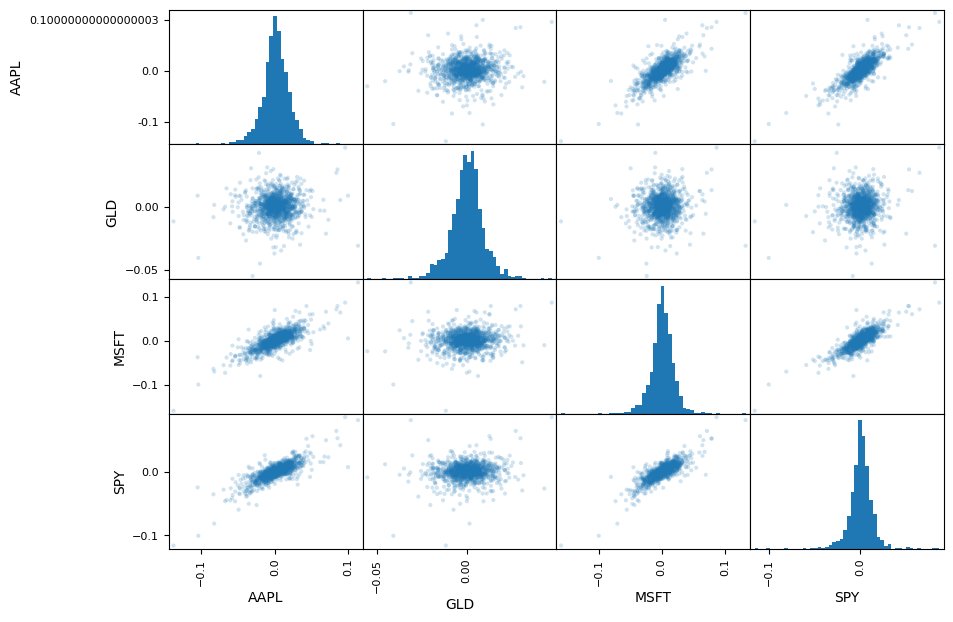

In [30]:
import pandas as pd

pd.plotting.scatter_matrix(rentabilidad, figsize=(10, 7), alpha=0.2, hist_kwds={"bins":50});

Visualizando la covarianza podemos ver si dos activos están correlacionados, pero no podemos ver la fuerza de la correlación. Para ello tenemos que utilizar la correlación y no la covarianza.

$$Var(x)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})^2}$$

$$Std(x)=\sqrt{Var(x)}$$

$$Cov(x,y)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})(y-\bar{y})} $$

$$Corr(x,y)=\frac{Cov(x,y)}{Std(x)Std(y)}$$

In [31]:
corr = rentabilidad.corr()
corr

Ticker,AAPL,GLD,MSFT,SPY
Ticker,,,,
AAPL,1.000000,0.085376,0.760846,0.805812
GLD,0.085376,1.000000,0.091757,0.107630
MSFT,0.760846,0.091757,1.000000,0.825804
SPY,0.805812,0.107630,0.825804,1.000000


Heatmap

Ref.: https://seaborn.pydata.org/generated/seaborn.heatmap.html

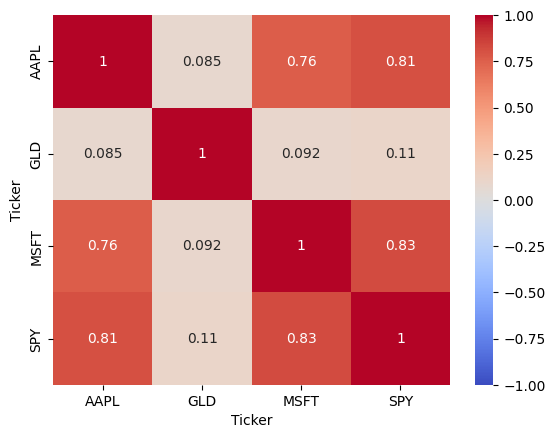

In [32]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

Ejercicio: Comparación de carteras y análisis de rentabilidad y riesgo

Descripción del ejercicio: Se pide comparar dos carteras con composiciones distintas para analizar sus rentabilidades y volatilidades. La primera cartera está formada por un 60% de AAPL y un 40% de GLD, mientras que la segunda cartera está compuesta por un 60% de AAPL y un 40% de MSFT.

Instrucciones:

a) Calcula las rentabilidades diarias de ambas carteras utilizando datos históricos de ejercicios anteriores para AAPL, GLD, y MSFT.

b) Grafica las rentabilidades acumuladas diarias de cada una de las carteras en una misma gráfica.

c) Calcula la rentabilidad media y la volatilidad de cada una de las carteras.

d) Compara los resultados de las dos carteras y explica las diferencias observadas tanto en las gráficas como en las medidas de rentabilidad y volatilidad.